# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Create empty lists to append the data 
selected_city=[]
clouds=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

counter=1
    
#Make a request for each of the cities

print("Beginning Data Retrieval")
print("-" * 30)

#Loop thru cities
for city in cities:
   
    try: 
        response = requests.get(query_url + city).json() 
        selected_city.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {counter} | {city}")
        counter=counter+1
        
    except:
        print("City not found. Skipping...")
    continue
    
print("-" * 30)    
print("Data Retrieval Complete")    
print("-" * 30)   

        


Beginning Data Retrieval
------------------------------
Processing Record 1 | bethel
City not found. Skipping...
Processing Record 2 | atuona
Processing Record 3 | charleston
Processing Record 4 | georgetown
Processing Record 5 | camapua
Processing Record 6 | punta arenas
City not found. Skipping...
Processing Record 7 | jamestown
Processing Record 8 | lompoc
Processing Record 9 | kapan
City not found. Skipping...
City not found. Skipping...
Processing Record 10 | kapaa
Processing Record 11 | paka
Processing Record 12 | esperance
Processing Record 13 | binga
Processing Record 14 | cherskiy
Processing Record 15 | rikitea
Processing Record 16 | vardo
Processing Record 17 | busselton
Processing Record 18 | calvinia
Processing Record 19 | hobart
Processing Record 20 | carnarvon
Processing Record 21 | longyearbyen
City not found. Skipping...
Processing Record 22 | sitka
Processing Record 23 | pontes e lacerda
Processing Record 24 | port elizabeth
Processing Record 25 | osinniki
Processing R

Processing Record 229 | lusambo
Processing Record 230 | kitimat
Processing Record 231 | pacific grove
Processing Record 232 | tuatapere
Processing Record 233 | sainte-savine
Processing Record 234 | hambantota
Processing Record 235 | mongu
Processing Record 236 | mahibadhoo
City not found. Skipping...
Processing Record 237 | dunedin
Processing Record 238 | homer
Processing Record 239 | patnos
Processing Record 240 | riyadh
Processing Record 241 | auki
Processing Record 242 | khatanga
Processing Record 243 | panama city
Processing Record 244 | aksu
Processing Record 245 | leningradskiy
Processing Record 246 | barsovo
Processing Record 247 | batagay-alyta
Processing Record 248 | rawson
Processing Record 249 | chipata
Processing Record 250 | palapye
City not found. Skipping...
Processing Record 251 | kruisfontein
Processing Record 252 | pevek
Processing Record 253 | novikovo
City not found. Skipping...
City not found. Skipping...
Processing Record 254 | waipawa
Processing Record 255 | kosa

Processing Record 458 | port blair
City not found. Skipping...
Processing Record 459 | goderich
City not found. Skipping...
Processing Record 460 | mbandaka
Processing Record 461 | oranjestad
Processing Record 462 | corinth
Processing Record 463 | plettenberg bay
Processing Record 464 | togitsu
Processing Record 465 | avigliano
Processing Record 466 | sola
Processing Record 467 | port-gentil
Processing Record 468 | los llanos de aridane
Processing Record 469 | horconcitos
Processing Record 470 | willowmore
Processing Record 471 | veinticinco de diciembre
Processing Record 472 | atbasar
Processing Record 473 | gayny
City not found. Skipping...
Processing Record 474 | nueva loja
Processing Record 475 | ghugus
Processing Record 476 | orel-izumrud
City not found. Skipping...
Processing Record 477 | leh
Processing Record 478 | tura
Processing Record 479 | yuli
Processing Record 480 | arroyo
Processing Record 481 | mimoso do sul
Processing Record 482 | ribeira grande
Processing Record 483 | 

In [4]:
#Display the DataFrame from collected data

weather_data=pd.DataFrame({
    "City":selected_city,
    "Cloudiness":clouds,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max_Temp":max_temp,
    "Wind_Speed":wind_speed
})

weather_data.count()


City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max_Temp      584
Wind_Speed    584
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export data frame to CSV
weather_data.to_csv('weather_data.csv')


In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Bethel,90,US,1563738877,100,60.79,-161.76,53.60,10.29
1,Atuona,100,PF,1563738877,73,-9.80,-139.03,80.43,8.81
2,Charleston,1,US,1563738766,63,32.79,-79.94,97.00,12.75
3,Georgetown,40,GY,1563738588,70,6.80,-58.16,87.80,9.17
4,Camapua,100,BR,1563738878,34,-19.53,-54.04,75.75,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

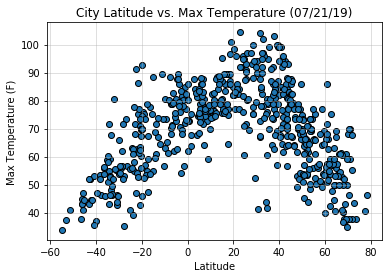

In [13]:
# Building a scatter plot comparing latitude v temperature

plt.scatter(weather_data['Lat'], weather_data['Max_Temp'],marker="o",edgecolor="black")

plt.title("City Latitude vs. Max Temperature (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=0.50)

#Save the image
plt.savefig("../Images/LatvsTemperature.png")

#### Latitude vs. Humidity Plot

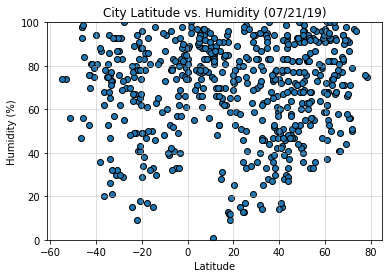

In [15]:
# Building a scatter plot comparing latitude v Humidity
plt.scatter(weather_data['Lat'], weather_data['Humidity'],marker="o",edgecolor="black")

plt.title("City Latitude vs. Humidity (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.ylim(0,100)
plt.grid(alpha=0.50)

#Save the image
plt.savefig("../Images/LatvsHumidity.png")


#### Latitude vs. Cloudiness Plot

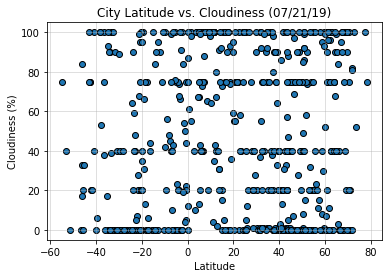

In [17]:
# Building a scatter plot comparing latitude v Cloudiness
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'],marker="o",edgecolor="black")

plt.title("City Latitude vs. Cloudiness (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=0.50)

#Save the image
plt.savefig("../Images/LatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

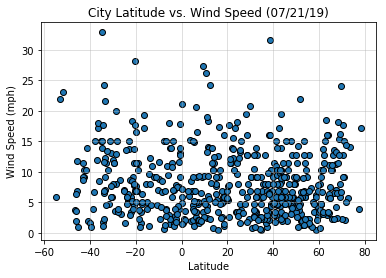

In [18]:
# Building a scatter plot comparing latitude v Cloudiness
plt.scatter(weather_data['Lat'], weather_data['Wind_Speed'],marker="o",edgecolor="black")

plt.title("City Latitude vs. Wind Speed (07/21/19)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid(alpha=0.50)

#Save the image
plt.savefig("../Images/LatvsWindSpeed.png")